In [1]:
# use print only as a function
from __future__ import print_function
import sys
sys.version_info

sys.version_info(major=3, minor=5, micro=2, releaselevel='final', serial=0)

In [210]:
__author__ = 'swe03'

import argparse

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.pyplot as pplt
from decimal import *

%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 15, 6

from statsmodels.graphics.api import qqplot

from scipy import stats

desired_width = 250
pd.set_option('display.width',desired_width)

In [3]:
#!pip install seaborn

In [4]:
import datetime
from dateutil.relativedelta import relativedelta
import seaborn as sns
import statsmodels.api as sm  
import statsmodels.tsa as tsa
from statsmodels.tsa.stattools import acf  
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.seasonal import seasonal_decompose

In [5]:
#!pip install pandasql
from pandasql import PandaSQL 
pdsql = PandaSQL()

##### Read the BQ tables created in the Dst Addr and Port profile 1 or Iterate and Create ADS's 1 programs

In [56]:
#!pip install google-api-python-client
p53_ts = pd.read_gbq("select * from prod.ts_port_53_4wks", project_id="network-sec-analytics")
#p53_ts

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 672 rows.

Total time taken 1.34 s.
Finished at 2016-12-30 20:12:53.


In [57]:
p53_ts=p53_ts.sort_values(['date_hour'],ascending=True)
#p53_ts

In [58]:
# Create an Hour only variable for the Seasonal Dummies variable creation
p53_ts['hour'] = p53_ts.date_hour.dt.strftime('%H')  # Get the Hour

In [59]:
# Create a Weekday variable for the Seasonal Dummies variable creation
p53_ts['weekday'] = p53_ts.date_hour.dt.strftime('%w')  # Get Weekday

In [60]:
p53_ts

,date_hour,dst_port,count,max,bytes_mean,min,hour,weekday
228,2016-11-20 00:00:00,53,55,576,143.29,61,00,0
57,2016-11-20 01:00:00,53,51,722,154.22,63,01,0
433,2016-11-20 02:00:00,53,59,408,146.71,66,02,0
310,2016-11-20 03:00:00,53,55,576,135.29,63,03,0
428,2016-11-20 04:00:00,53,59,432,130.32,67,04,0
171,2016-11-20 05:00:00,53,51,576,141.29,63,05,0
342,2016-11-20 06:00:00,53,58,552,145.21,67,06,0
75,2016-11-20 07:00:00,53,55,558,145.96,60,07,0
397,2016-11-20 08:00:00,53,57,516,155.09,65,08,0
201,2016-11-20 09:00:00,53,52,408,135.52,67,09,0


In [67]:
def hour_seasonal_creation(): 
    for index, row in p53_ts.iterrows():
        row_hour = int(row['hour'])
        for i in range(0, 23):
            if row_hour == i:
                p53_ts.loc[index, 'hvar'+ str(i)] = 1
            else:
                p53_ts.loc[index, 'hvar'+ str(i)] = 0
#hour_seasonal_creation()

<function __main__.hour_seasonal_creation>

In [71]:
def weekday_seasonal_creation(): 
    for index, row in p53_ts.iterrows():
        row_weekday = int(row['weekday'])
        for i in range(0, 7):
            if row_weekday == i:
                p53_ts.loc[index, 'wdvar'+ str(i)] = 1
            else:
                p53_ts.loc[index, 'wdvar'+ str(i)] = 0
                
weekday_seasonal_creation()

In [223]:
p53_ts2 = p53_ts.reset_index(drop=True)

In [224]:
p53_ts2

,date_hour,dst_port,count,max,bytes_mean,min,hour,weekday,wdvar0,wdvar1,wdvar2,wdvar3,wdvar4,wdvar5,wdvar6,forecast,countf
0,2016-11-20 00:00:00,53,55,576,143.29,61,00,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.780322,55.0
1,2016-11-20 01:00:00,53,51,722,154.22,63,01,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,51.780322,51.0
2,2016-11-20 02:00:00,53,59,408,146.71,66,02,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,59.0
3,2016-11-20 03:00:00,53,55,576,135.29,63,03,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,55.0
4,2016-11-20 04:00:00,53,59,432,130.32,67,04,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,59.0
5,2016-11-20 05:00:00,53,51,576,141.29,63,05,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,51.0
6,2016-11-20 06:00:00,53,58,552,145.21,67,06,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,58.0
7,2016-11-20 07:00:00,53,55,558,145.96,60,07,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,55.0
8,2016-11-20 08:00:00,53,57,516,155.09,65,08,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,57.0
9,2016-11-20 09:00:00,53,52,408,135.52,67,09,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,52.0


In [19]:
# Need a new Feature created since we repurpose date_hour as Index below
p53_ts['Date_Hour'] = p53_ts['date_hour']
#p53_ts

In [20]:
#Need an Index for the Seasonal Decompostion below
p53_ts.reset_index(inplace=True)
p53_ts = p53_ts.set_index('date_hour')
p53_ts.index.dtype      # Note in the output:dtype('<M8[ns]') but...  np.dtype('datetime64[ns]') = np.dtype('<M8[ns]'):

dtype('<M8[ns]')

##### Execute some Univariate Statistics

In [21]:
p53_ts['bytes_mean'].describe()

count     672.000000
mean      152.840908
std       224.403124
min       105.840000
25%       130.797500
50%       139.000000
75%       147.482500
max      5624.690000
Name: bytes_mean, dtype: float64

In [28]:
p53_ts['hvar0'].loc[p53_ts['hvar0']== 1].describe()

count    28.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: hvar0, dtype: float64

In [22]:
# Remove the Outliers
p53_ts[p53_ts['bytes_mean'] >1000] = 150
p53_ts['bytes_mean'].describe()

count    672.000000
mean     142.010074
std       28.014244
min      105.840000
25%      130.797500
50%      139.000000
75%      147.482500
max      707.840000
Name: bytes_mean, dtype: float64

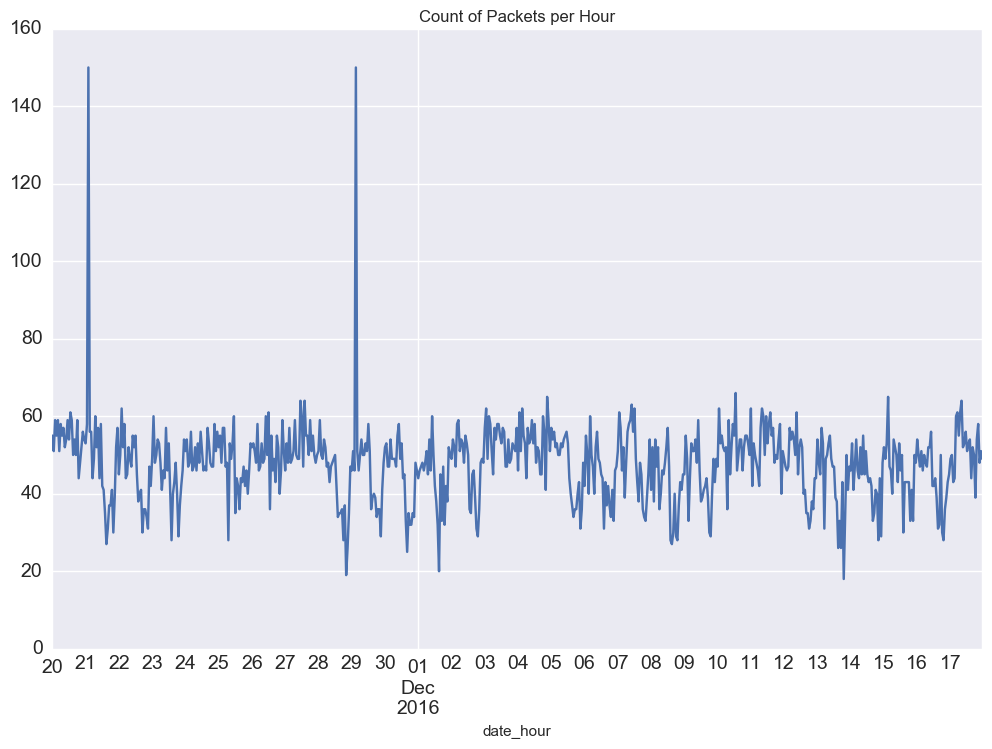

In [23]:
# This plots all of the variables
#p53_ts.plot(figsize=(12,8), title= 'Mean Packet Size in Bytes', fontsize=14)

#p53_ts.bytes_mean.plot(figsize=(12,8), title= 'Mean Packet Size in Bytes', fontsize=14)
p53_ts['count'].plot(figsize=(12,8), title= 'Count of Packets per Hour', fontsize=14)
plt.savefig('Packet_Count.png', bbox_inches='tight')

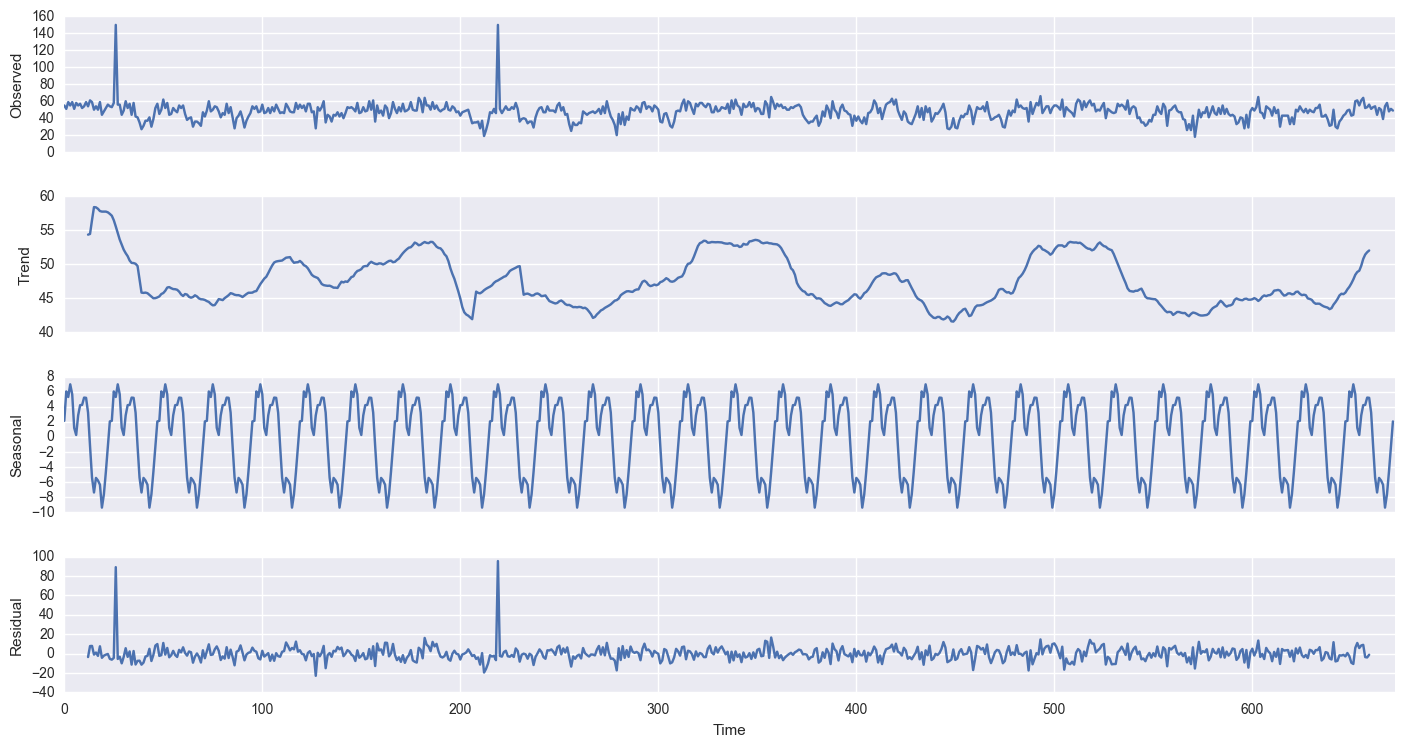

In [29]:
decomposition = seasonal_decompose(p53_ts['count'].values,freq=24)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

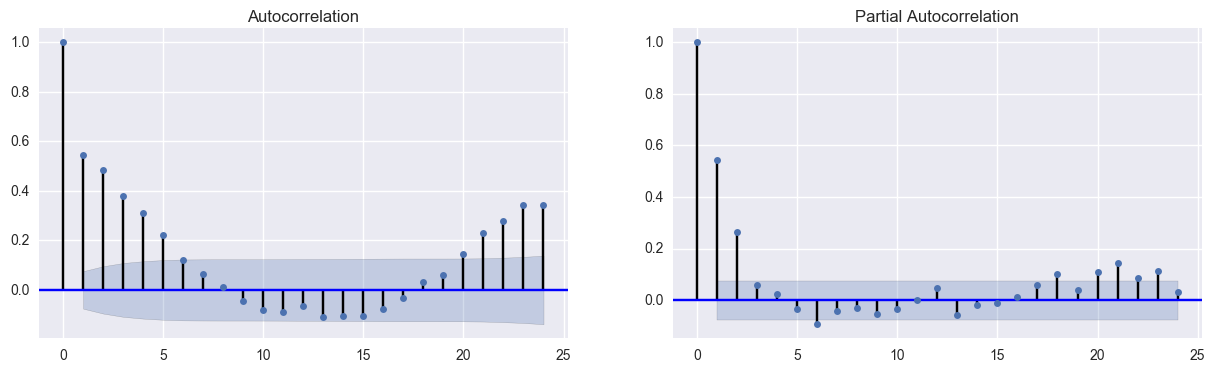

In [156]:
# Graph data
fig, axes = plt.subplots(1, 2, figsize=(15,4))

fig = sm.graphics.tsa.plot_acf(p53_ts['count'], lags=24, ax=axes[0])
fig = sm.graphics.tsa.plot_pacf(p53_ts['count'], lags=24, ax=axes[1])

In [75]:
##exog = np.column_stack(list_of_lists)
a = np.array(p53_ts['wdvar0'])
b = np.array(p53_ts['wdvar1'])
c = np.array(p53_ts['wdvar2'])
d = np.array(p53_ts['wdvar3'])
e = np.array(p53_ts['wdvar4'])
f = np.array(p53_ts['wdvar5'])
g = np.array(p53_ts['wdvar6'])
exog1 = np.column_stack((a,b,c,d,e,f,g))
#exog1
exog2 = np.column_stack((a,b,c,d,e,f))

array([[ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       [ 1.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.],
       [ 0.,  0.,  0., ...,  0.,  0.,  1.]])

In [155]:
# This will just create the array
sc_out = results.test_serial_correlation(method=None,lags=24)
sc_out

array([[[  5.38894036e+00,   3.26595755e+01,   3.34375254e+01,
           3.37346801e+01,   3.40947105e+01,   3.80005971e+01,
           3.84489636e+01,   3.85477149e+01,   3.92620903e+01,
           4.20745823e+01,   4.29280734e+01,   4.45922997e+01,
           4.51443705e+01,   4.53303264e+01,   4.65632029e+01,
           4.87024995e+01,   4.91540772e+01,   4.94758814e+01,
           5.27189889e+01,   5.27190939e+01,   5.50092845e+01,
           5.66592887e+01,   6.77677040e+01,   6.80705071e+01],
        [  2.02647732e-02,   8.09213826e-08,   2.60399937e-07,
           8.44631349e-07,   2.27983342e-06,   1.12305880e-06,
           2.48913823e-06,   5.96196944e-06,   1.03320489e-05,
           7.27296984e-06,   1.11784967e-05,   1.21008529e-05,
           1.97981452e-05,   3.60512240e-05,   4.32442247e-05,
           3.68194973e-05,   5.70997465e-05,   9.05570566e-05,
           5.16036019e-05,   8.93719355e-05,   7.04726331e-05,
           6.87451627e-05,   2.67599188e-06,   4.26870

In [197]:
# This is the beginning of the ARMA modeling.
# This is to satisfy a data type constraint below in the ARMA model
p53_ts['countf'] = p53_ts['count'].astype(float,copy=True)

In [198]:
#mod = tsa.arima_model.ARIMA(p53_ts['count'], order=(2,0,0),dates=p53_ts['date_hour'])
arma1 = sm.tsa.ARMA(p53_ts['countf'], (2,5)).fit()
print(arma1.params)


const           47.484492
ar.L1.countf     0.399879
ar.L2.countf     0.265992
dtype: float64


/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:225: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [200]:
print(arma1.aic, arma1.bic, arma1.hqic)

4487.909791238515 4505.9508246 4494.89682435


In [201]:
sm.stats.durbin_watson(arma1.resid.values)

2.0306849809727483

In [205]:
 resid1 = arma1.resid

In [207]:
stats.normaltest(resid1)

NormaltestResult(statistic=12.803513998784075, pvalue=0.0016586404812063463)

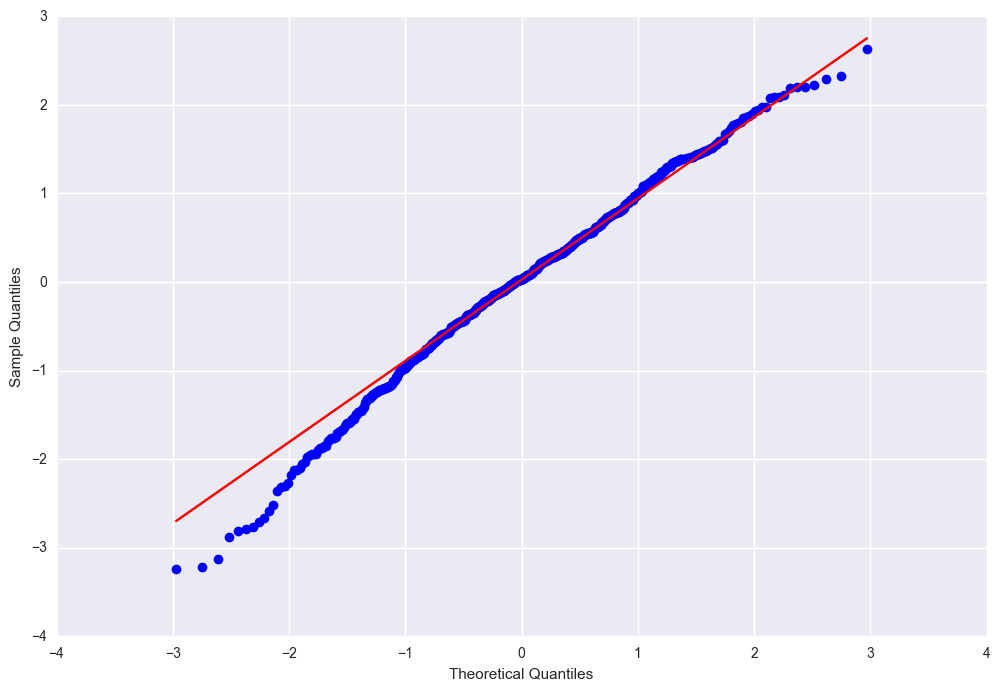

In [211]:
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
fig = qqplot(resid1, line='q', ax=ax, fit=True)

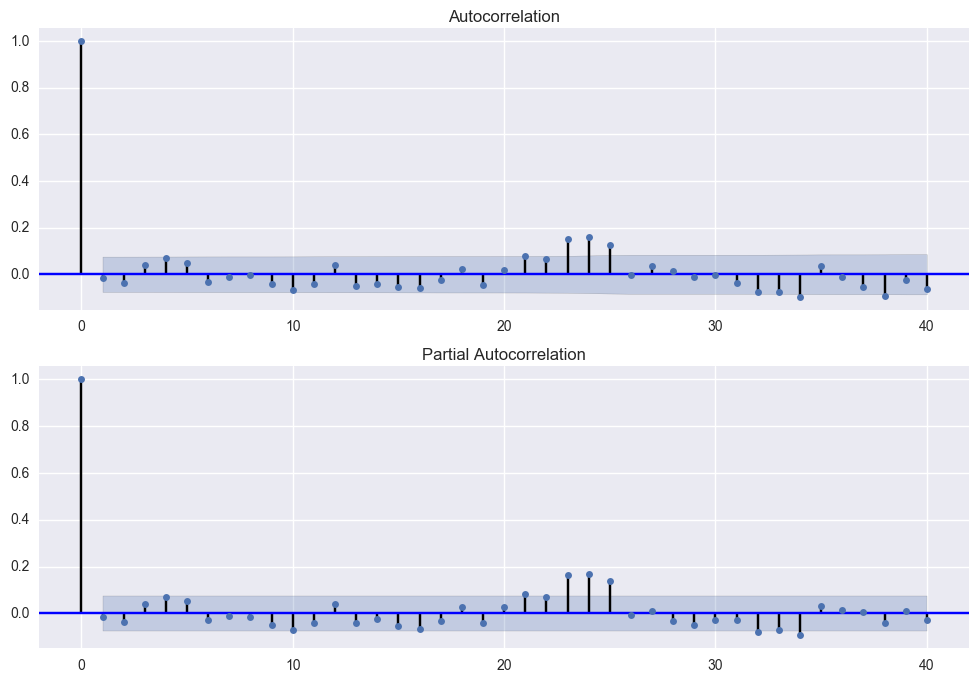

In [212]:
# Graph the acf and pacf for the Residuals
fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)
fig = sm.graphics.tsa.plot_acf(resid1.values.squeeze(), lags=40, ax=ax1)
ax2 = fig.add_subplot(212)
fig = sm.graphics.tsa.plot_pacf(resid1, lags=40, ax=ax2)

In [215]:
r,q,p = sm.tsa.acf(resid1.values.squeeze(), qstat=True)
data = np.c_[range(1,41), r[1:], q, p]
table = pd.DataFrame(data, columns=['lag', "AC", "Q", "Prob(>Q)"])
print(table.set_index('lag'))

            AC           Q      Prob(>Q)
lag                                     
1.0  -0.016261    0.178488  6.726759e-01
2.0  -0.036034    1.056259  5.897069e-01
3.0   0.041262    2.208947  5.301883e-01
4.0   0.069192    5.455107  2.437039e-01
5.0   0.047348    6.977401  2.223265e-01
6.0  -0.034670    7.794851  2.535216e-01
7.0  -0.009739    7.859449  3.451507e-01
8.0  -0.002059    7.862340  4.470315e-01
9.0  -0.043686    9.166090  4.220862e-01
10.0 -0.069068   12.429911  2.573137e-01
11.0 -0.040791   13.570042  2.577039e-01
12.0  0.040824   14.713768  2.574641e-01
13.0 -0.052342   16.596743  2.184003e-01
14.0 -0.041086   17.758728  2.179915e-01
15.0 -0.054262   19.788523  1.801962e-01
16.0 -0.057195   22.047121  1.416766e-01
17.0 -0.025982   22.513909  1.657542e-01
18.0  0.021344   22.829412  1.972308e-01
19.0 -0.045211   24.247158  1.868419e-01
20.0  0.019148   24.501871  2.211564e-01
21.0  0.080020   28.956890  1.150403e-01
22.0  0.064334   31.840878  8.014962e-02
23.0  0.153059  

In [218]:
# NOTE:  No params, as the model doc specifies, are given
predict_arma1 = arma1.predict(start=672, end=673, dynamic=True)
print(predict_arma1)

672    49.025609
673    48.503865
dtype: float64


/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:501: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


/Users/swe03/anaconda/lib/python3.5/site-packages/statsmodels/tsa/base/tsa_model.py:501: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


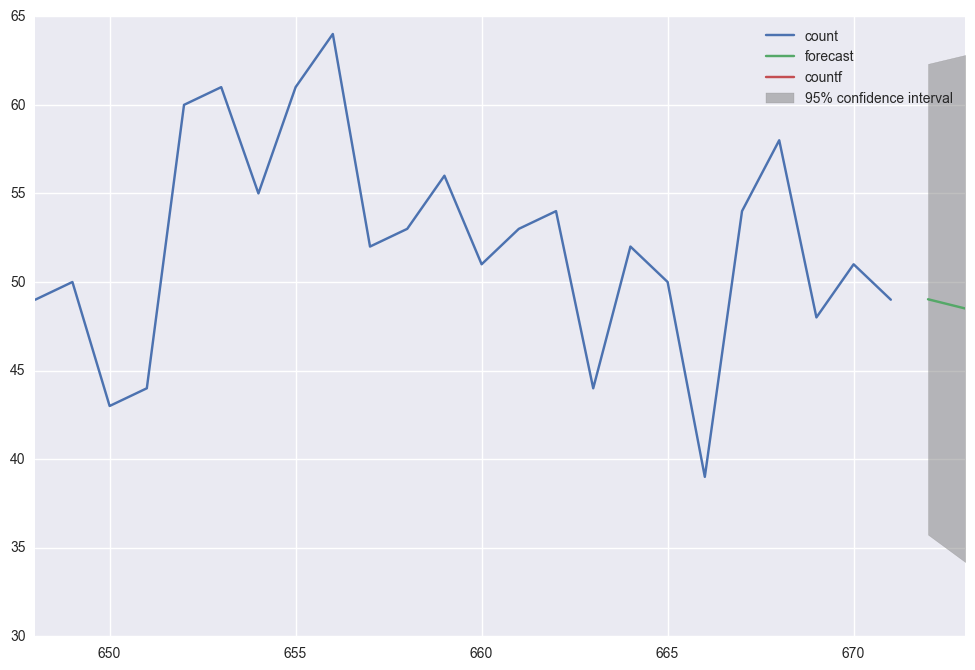

In [234]:
fig, ax = plt.subplots(figsize=(12, 8))
ax = p53_ts2['count'].ix['648':].plot(ax=ax)
fig = arma1.plot_predict(start=672, end=673, dynamic=True, ax=ax, plot_insample=True)